<H3 align = "left"> Detecting Arrhythmia Variant using Electrocardiogram Data </H3>

In [60]:
##############################################
## Packages Needed for this Assignmnent ##
##############################################

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import Normalizer
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import Ridge
from statistics import mean
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn import svm
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import StackingClassifier
from sklearn.ensemble import VotingClassifier, BaggingClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB


In [3]:
# Import the dataset
dataset = pd.read_csv("MIT-BIH Arrhythmia Database.csv")

TODO:
- take representative sample of dataset (aim for 15,000 rows)
- perform preprocessing 

In [4]:
# Random_state=42 ensures that each time this code runs, we will get the same N rows in the sample 
sampleOfData = dataset.sample(n=15000, random_state=777)

# To get different samples use sampleOfData = dataset.sample(n=NUMBER) 
#sampleOfData = dataset.sample(n=15000)


## Understanding the Data

- "record" is the name of the subject/patient.
- "type" is the target, which contains 5 categories of heartbeats:
    1. N (Normal)
    2. SVEB (Supraventricular ectopic beat)
    3. VEB (Ventricular ectopic beat)
    4. F (Fusion beat)
    5. Q (Unknown beat) <-- Will be removed because not so useful to our goal

## Data Visualization 

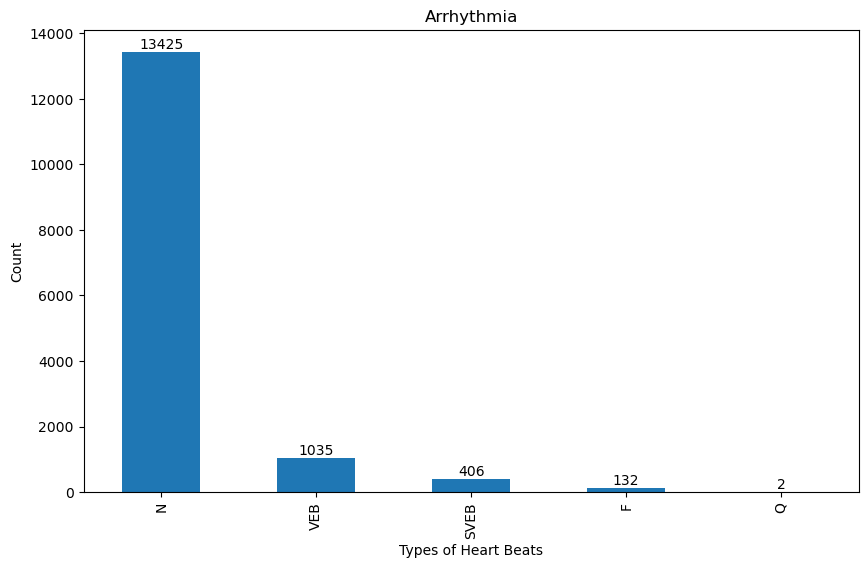

In [5]:
# Entire dataset 
# data = dataset['type'].value_counts()

# Sample dataset 
data = sampleOfData['type'].value_counts()

# Create a bar plot
plt.figure(figsize=(10,6))
bars = data.plot(kind='bar')

# Set the title and labels
plt.title('Arrhythmia')
plt.xlabel('Types of Heart Beats')
plt.ylabel('Count')

for container in bars.containers:
    bars.bar_label(container)

# Show the plot
plt.show()

### Don't remove the comment below until final! It will take a lot of spaces

In [5]:
#data visualization (before data cleaning)
# features = sampleOfData.drop('type', axis=1).columns
# target = sampleOfData['type']

# fig, axs = plt.subplots(len(features), 1, figsize=(5, 5*len(features)))

# for i, feature in enumerate(features):
#     axs[i].scatter(sampleOfData[feature], target)
#     axs[i].set_xlabel(feature)
#     axs[i].set_ylabel('Heartbeat')

# plt.tight_layout()
# plt.show()

## Data cleaning

In [6]:
#we drop "record" column from our dataset because it is not helpful as "record" is the name of the subject/patient.
sampleOfData.drop('record', axis=1, inplace=True)

In [7]:
# Function to replace outliers with the mean of that column (NOTE: I USED SAMPLEDATA NOT DATA)
# def replaceOutliers (sd, column):
#     Q1 = sd[column].quantile(0.25)
#     Q3 = sd[column].quantile(0.75)
#     IQR = Q3 - Q1
#     lowerBound = Q1 - 1.5 * IQR
#     upperBound = Q3 + 1.5 * IQR

#     # Calculating the mean W/O outliers 
#     temp = sd[(sd[column] >= lowerBound) & (sd[column] <= upperBound)]
#     mean = temp[column].mean()
    
#     sd.loc[(sd[column] < lowerBound) | (sd[column] > upperBound), column] = mean
#     return sd

# # Columns we want to check for outliers 
# columnCheck = [
#     '0_pre-RR', '0_post-RR', '0_pPeak', '0_tPeak',
#     '0_rPeak', '0_sPeak', '0_qPeak', '0_qrs_interval',
#     '0_pq_interval', '0_qt_interval', '0_st_interval', '0_qrs_morph0',
#     '0_qrs_morph1', '0_qrs_morph2', '0_qrs_morph3', '1_pre-RR', '1_post-RR',
#     '1_pPeak', '1_tPeak', '1_rPeak', '1_sPeak', '1_qPeak',
#     '1_qrs_interval', '1_pq_interval', '1_qt_interval', '1_st_interval', '1_qrs_morph0', '1_qrs_morph1',
#     '1_qrs_morph2', '1_qrs_morph2', '1_qrs_morph4'
# ]

# for col in columnCheck:
#     sampleOfData = replaceOutliers(sampleOfData, col)


# # Seeing if theres still same amount of rows after replacing outliers 
# print(sampleOfData.shape)


In [7]:
#check for the null or missing value in the dataset
dataset.isnull().sum()
sampleOfData.isnull().sum()

type              0
0_pre-RR          0
0_post-RR         0
0_pPeak           0
0_tPeak           0
0_rPeak           0
0_sPeak           0
0_qPeak           0
0_qrs_interval    0
0_pq_interval     0
0_qt_interval     0
0_st_interval     0
0_qrs_morph0      0
0_qrs_morph1      0
0_qrs_morph2      0
0_qrs_morph3      0
0_qrs_morph4      0
1_pre-RR          0
1_post-RR         0
1_pPeak           0
1_tPeak           0
1_rPeak           0
1_sPeak           0
1_qPeak           0
1_qrs_interval    0
1_pq_interval     0
1_qt_interval     0
1_st_interval     0
1_qrs_morph0      0
1_qrs_morph1      0
1_qrs_morph2      0
1_qrs_morph3      0
1_qrs_morph4      0
dtype: int64

In [8]:
#check for the number of duplicates in the dataset
dataset.duplicated().sum()
sampleOfData.duplicated().sum()


0

## Data Analysis

In [9]:
# Printing the Summary Statistics of the Sample Dataset 
print(sampleOfData.describe())

           0_pre-RR     0_post-RR       0_pPeak       0_tPeak       0_rPeak  \
count  15000.000000  15000.000000  15000.000000  15000.000000  15000.000000   
mean     278.564667    278.653733      0.052359      0.372129      1.055622   
std       79.823633     80.418739      0.171497      0.743995      0.621826   
min       28.000000     17.000000     -0.685050     -2.006422     -1.982220   
25%      231.000000    231.000000     -0.054327     -0.255204      0.758040   
50%      267.000000    266.000000      0.017293      0.238855      1.107537   
75%      323.000000    322.000000      0.127910      0.929731      1.428403   
max     1439.000000   2114.000000      2.180520      3.158970      3.091004   

            0_sPeak       0_qPeak  0_qrs_interval  0_pq_interval  \
count  15000.000000  15000.000000    15000.000000   15000.000000   
mean      -0.140082     -0.090852       28.313133      11.025400   
std        1.031681      0.194598       14.975100       9.562352   
min       -2.837

In [11]:
# Visualizing the data after replacing the outliers with the mean (NOTE: i want to add this to data visualization seciton but this could only work after cleaning the data)
# for column in columnCheck:
#     plt.figure(figsize=(5, 2))
#     sns.boxplot(y=sampleOfData[column])
#     plt.title(column)
#     plt.show()

In [10]:
# Before we encode the data, we remove the target (in type) that is Q (unknown) because it is not beneficial to include these in our dataset
sampleOfData = sampleOfData[sampleOfData.type != "Q"]

# With encoder, F = 0, N = 1, SVEB = 2, VEB = 3, 
le = LabelEncoder()
sampleOfData['type'] = le.fit_transform(sampleOfData['type'])

<Axes: >

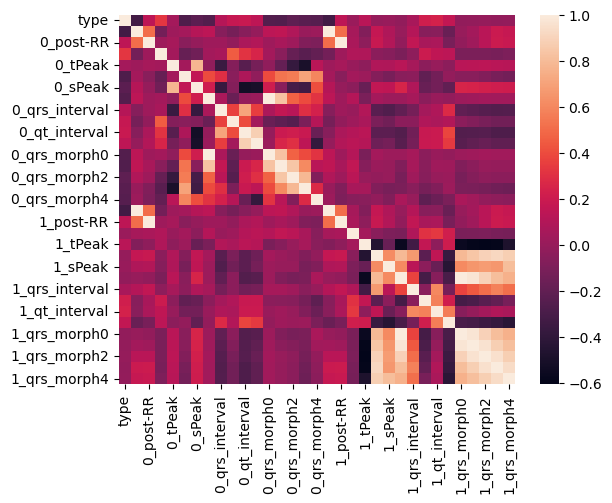

In [11]:
#check for correlations using heatmaps
correlation = sampleOfData.corr()
sns.heatmap(correlation)

Dataset distribution before SMOTE:
type
1    13425
3     1035
2      406
0      132
Name: count, dtype: int64
Dataset distribution after SMOTE:
type
1    13425
3    13425
2    13425
0    13425
Name: count, dtype: int64


/var/folders/cx/jj67ghxj5w9gsyhlcwjvf6540000gn/T/ipykernel_47528/2861652453.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=y_smote.value_counts().index, y=y_smote.value_counts().values, palette='deep')


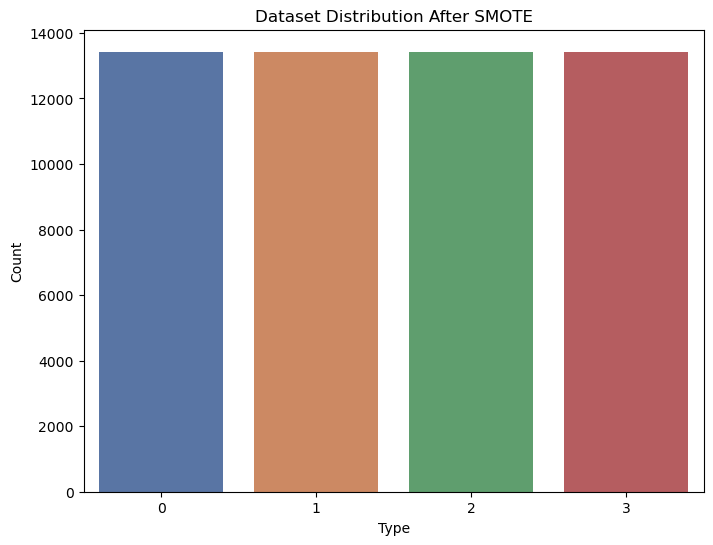

In [12]:
SampleDataset_smote = sampleOfData.copy()

#We are focusing on creating equal numbers for the type of heart beat
X = SampleDataset_smote.drop(columns=['type'])
y = SampleDataset_smote['type']

#Here is smote 
smote = SMOTE(random_state=777) 
X_smote, y_smote = smote.fit_resample(X, y)

#Combine the resampled features back into "dataset_smote"
SampleDataset_smote = pd.concat([X_smote, y_smote], axis=1) 

#Before
print("Dataset distribution before SMOTE:")
print(y.value_counts())

#After
print("Dataset distribution after SMOTE:")
print(y_smote.value_counts())

#Visualization via bar graph
plt.figure(figsize=(8, 6))
sns.barplot(x=y_smote.value_counts().index, y=y_smote.value_counts().values, palette='deep')
plt.title('Dataset Distribution After SMOTE')
plt.xlabel('Type')
plt.ylabel('Count')
plt.show()

#print(SampleDataset_smote.columns)

## Identify the most optimized model

### TODO: Boosting and voting classifier 

In [43]:
# Target --> identifying the type (N (Normal),  SVEB (Supraventricular ectopic beat)
# VEB (Ventricular ectopic beat), F (Fusion beat), and Q (Unknown beat))

# Features --> all other columns 
X = SampleDataset_smote.drop('type', axis=1)
y = SampleDataset_smote['type']


# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=777)

# Standardizing the features
scaler = StandardScaler()
X_trainScaled = scaler.fit_transform(X_train)
X_testScaled = scaler.transform(X_test)

### Logistic Regression (without Normalization)

In [44]:
# Logistic Regression 
logisticReg = LogisticRegression(max_iter=1000)
logisticReg.fit(X_trainScaled, y_train) 

# test set
yPredLogReg = logisticReg.predict(X_testScaled)

# test set calculation
accuracyLR = accuracy_score(y_test, yPredLogReg)
precisionLR = precision_score(y_test, yPredLogReg, average='weighted')
recallLR = recall_score(y_test, yPredLogReg, average='weighted')
f1LR = f1_score(y_test, yPredLogReg, average='weighted')
cmLR = confusion_matrix(y_test, yPredLogReg)


### Logistic Regression (with Normalization)

In [46]:
normalizer = Normalizer()
X_trainNormal = normalizer.fit_transform(X_train)
X_testNormal = normalizer.transform(X_test)

X_trainScaledNormal = scaler.fit_transform(X_trainNormal)
X_testScaledNormal = scaler.transform(X_testNormal)

# Logistic Regression with normalized and scaled data
logisticRegNorm = LogisticRegression(max_iter=1000)
logisticRegNorm.fit(X_trainScaledNormal, y_train)

# Testing set predictions
yPredLogRegNorm = logisticRegNorm.predict(X_testScaledNormal)

# Testing set performance metrics
accuracyLRN = accuracy_score(y_test, yPredLogRegNorm)
precisionLRN = precision_score(y_test, yPredLogRegNorm, average='weighted')
recallLRN = recall_score(y_test, yPredLogRegNorm, average='weighted')
f1LRN = f1_score(y_test, yPredLogRegNorm, average='weighted')
cmLRN = confusion_matrix(y_test, yPredLogRegNorm)


### KNN (without Normalization)

In [48]:
knn = KNeighborsClassifier()
knn.fit(X_trainScaled, y_train)

# testing set
yPredKNN = knn.predict(X_testScaled)

# testing set calculation
accuracyKNN = accuracy_score(y_test, yPredKNN)
precisionKNN = precision_score(y_test, yPredKNN, average='weighted')
recallKNN = recall_score(y_test, yPredKNN, average='weighted')
f1KNN = f1_score(y_test, yPredKNN, average='weighted')
cmKNN = confusion_matrix(y_test, yPredKNN)


### KNN (with Normalization)

In [49]:
normalizer = Normalizer()
X_normal = normalizer.fit_transform(X)

X_scaledNormal = scaler.fit_transform(X_normal)

knnNorm = KNeighborsClassifier()
knnNorm.fit(X_scaledNormal, y)

y_pred_knn_norm = knnNorm.predict(X_scaledNormal)

accuracyKNNnorm = accuracy_score(y, y_pred_knn_norm)
precisionKNNnorm = precision_score(y, y_pred_knn_norm, average='weighted')
recallKNNnorm = recall_score(y, y_pred_knn_norm, average='weighted')
f1KNNnorm = f1_score(y, y_pred_knn_norm, average='weighted')
cmKNNnorm = confusion_matrix(y, y_pred_knn_norm)


### Decision Tree (without Normalization)

In [52]:
# Decision Tree without normalization
decisionTree = DecisionTreeClassifier()
decisionTree.fit(X_trainScaled, y_train)

# Testing set predictions
yPredDT = decisionTree.predict(X_testScaled)

# Testing set performance metrics
accuracyDT = accuracy_score(y_test, yPredDT)
precisionDT = precision_score(y_test, yPredDT, average='weighted')
recallDT = recall_score(y_test, yPredDT, average='weighted')
f1DT = f1_score(y_test, yPredDT, average='weighted')
cmDT = confusion_matrix(y_test, yPredDT)


### Decision Tree (with Normalization)

In [51]:
normalizer = Normalizer()
X_normal = normalizer.fit_transform(X)

X_scaledNormal = scaler.fit_transform(X_normal)

decisionTreeNorm = DecisionTreeClassifier()
decisionTreeNorm.fit(X_scaledNormal, y)

y_pred_dt_norm = decisionTreeNorm.predict(X_scaledNormal)

accuracyDTNorm = accuracy_score(y, y_pred_dt_norm)
precisionDTNorm = precision_score(y, y_pred_dt_norm, average='weighted')
recallDTNorm = recall_score(y, y_pred_dt_norm, average='weighted')
f1DTNorm = f1_score(y, y_pred_dt_norm, average='weighted')
cmDTNorm = confusion_matrix(y, y_pred_dt_norm)


### SVM without kernel (without Normalization)

In [35]:
linearSVM = svm.LinearSVC(C=0.1, max_iter=5000)
linearSVM.fit(X_trainScaled, y_train)
yPredLSVM = linearSVM.predict(X_testScaled)

accuracyLSVM = accuracy_score(y_test, yPredLSVM)
precisionLSVM = precision_score(y_test, yPredLSVM, average='weighted')
recallLSVM = recall_score(y_test, yPredLSVM, average='weighted')
f1LSVM = f1_score(y_test, yPredLSVM, average='weighted')
cmLSVM = confusion_matrix(y_test, yPredLSVM)

### SVM without Kernel (with Normalization)

In [36]:
linearNSVM = svm.LinearSVC(C=0.1, max_iter=5000)
linearNSVM.fit(X_trainNormal, y_train)
yPredNLSVM = linearNSVM.predict(X_testNormal)

accuracyNLSVM = accuracy_score(y_test, yPredNLSVM)
precisionNLSVM = precision_score(y_test, yPredNLSVM, average='weighted')
recallNLSVM = recall_score(y_test, yPredNLSVM, average='weighted')
f1NLSVM = f1_score(y_test, yPredNLSVM, average='weighted')
cmNLSVM = confusion_matrix(y_test, yPredNLSVM)

### Random Forest Classifier (without Normalization)

In [37]:
RFC = RandomForestClassifier()
RFC.fit(X_trainScaled, y_train)
yPredRFC = RFC.predict(X_testScaled)

accuracyRFC = accuracy_score(y_test, yPredRFC)
precisionRFC = precision_score(y_test, yPredRFC, average='weighted')
recallRFC = recall_score(y_test, yPredRFC, average='weighted')
f1RFC = f1_score(y_test, yPredRFC, average='weighted')
cmRFC = confusion_matrix(y_test, yPredRFC)

### Bagging (with Logistic Regression)

In [38]:
bagging_clf = BaggingClassifier(estimator=logisticReg, n_estimators=10, random_state=42)
bagging_clf.fit(X_trainScaled, y_train)
yPredBag = bagging_clf.predict(X_testScaled)

accuracyBag = accuracy_score(y_test, yPredBag)
precisionBag = precision_score(y_test, yPredBag, average='weighted')
recallBag = recall_score(y_test, yPredBag, average='weighted')
f1Bag = f1_score(y_test, yPredBag, average='weighted')
cmBag = confusion_matrix(y_test, yPredBag)

### Boosting (Adaboost)

In [39]:
ada_clf = AdaBoostClassifier(estimator=logisticReg, n_estimators=10, random_state=42)
ada_clf.fit(X_trainScaled, y_train)
yPredAda = ada_clf.predict(X_testScaled)

accuracyAda = accuracy_score(y_test, yPredAda)
precisionAda = precision_score(y_test, yPredAda, average='weighted')
recallAda = recall_score(y_test, yPredAda, average='weighted')
f1Ada = f1_score(y_test, yPredAda, average='weighted')
cmAda = confusion_matrix(y_test, yPredAda)

/opt/anaconda3/envs/env2/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


### Voting Classifier (with weighted average probabilities)

In [40]:
voting_clf = VotingClassifier(
    estimators=[('lr', logisticReg), ('dt', decisionTree), ('knn', knn), ('rfc', RFC)],
    voting='soft' 
)
voting_clf.fit(X_trainScaled, y_train)
yPredVote = voting_clf.predict(X_testScaled)

accuracyVote = accuracy_score(y_test, yPredVote)
precisionVote = precision_score(y_test, yPredVote, average='weighted')
recallVote = recall_score(y_test, yPredVote, average='weighted')
f1Vote = f1_score(y_test, yPredVote, average='weighted')
cmVote = confusion_matrix(y_test, yPredVote)

### Stacking 

In [41]:
#base models
estimators = [
    ('dt', decisionTree),
    ('knn', knn,
    ('rfc', RFC))
]

#meta model
meta_model = logisticReg

stacking_clf = StackingClassifier(estimators=estimators, final_estimator=meta_model)
stacking_clf.fit(X_trainScaled, y_train)
yPredStack = stacking_clf.predict(X_testScaled)

accuracyStack = accuracy_score(y_test, yPredStack)
precisionStack = precision_score(y_test, yPredStack, average='weighted')
recallStack = recall_score(y_test, yPredStack, average='weighted')
f1Stack = f1_score(y_test, yPredStack, average='weighted')
cmStack = confusion_matrix(y_test, yPredStack)

### SVM with Kernel (without Normalization)

In [58]:
svm_rbf = SVC(kernel='rbf', gamma='scale')
svm_rbf.fit(X_trainScaled, y_train)

yPredSVMRBF = svm_rbf.predict(X_testScaled)

accuracySVMRBF = accuracy_score(y_test, yPredSVMRBF)
precisionSVMRBF = precision_score(y_test, yPredSVMRBF, average='weighted')
recallSVMRBF = recall_score(y_test, yPredSVMRBF, average='weighted')
f1SVMRBF = f1_score(y_test, yPredSVMRBF, average='weighted')
cmSVMRBF = confusion_matrix(y_test, yPredSVMRBF)


### SVM with Kernel (with Normalization)

In [59]:
normalizer = Normalizer()
X_normal = normalizer.fit_transform(X)
X_scaledNormal = scaler.fit_transform(X_normal)

svm_rbf_norm = SVC(kernel='rbf', gamma='scale')
svm_rbf_norm.fit(X_scaledNormal, y)

yPredSvmrbfNorm = svm_rbf_norm.predict(X_scaledNormal)

accuracySVMRBFNorm = accuracy_score(y, yPredSvmrbfNorm)
precisionSVMRBFNorm = precision_score(y, yPredSvmrbfNorm, average='weighted')
recallSVMRBFNorm = recall_score(y, yPredSvmrbfNorm, average='weighted')
f1SVMRBFNorm = f1_score(y, yPredSvmrbfNorm, average='weighted')
cmSVMRBFNorm = confusion_matrix(y, yPredSvmrbfNorm)


### Gaussian Naive Bayes (without Normalization)

In [62]:
gnb = GaussianNB()
gnb.fit(X_trainScaled, y_train)

yPredGNB = gnb.predict(X_testScaled)

accuracyGNB = accuracy_score(y_test, yPredGNB)
precisionGNB = precision_score(y_test, yPredGNB, average='weighted')
recallGNB = recall_score(y_test, yPredGNB, average='weighted')
f1GNB = f1_score(y_test, yPredGNB, average='weighted')
cmGNB = confusion_matrix(y_test, yPredGNB)

### Gaussian Naive Bayes (with Normalization)

In [64]:
normalizer = Normalizer()
X_normal = normalizer.fit_transform(X)
X_scaledNormal = scaler.fit_transform(X_normal)

gnb_norm = GaussianNB()
gnb_norm.fit(X_scaledNormal, y)

yPredgnbNorm = gnb_norm.predict(X_scaledNormal)

accuracyGNBNorm = accuracy_score(y, yPredgnbNorm)
precisionGNBNorm = precision_score(y, yPredgnbNorm, average='weighted')
recallGNBNorm = recall_score(y, yPredgnbNorm, average='weighted')
f1GNBNorm = f1_score(y, yPredgnbNorm, average='weighted')
cmGNBNorm = confusion_matrix(y, yPredgnbNorm)

### Data Summary

In [53]:
print("Logistic Regression: ")
print(f"Accuracy: {accuracyLR}")
print(f"Precision: {precisionLR}")
print(f"Recall: {recallLR}")
print(f"F1 Score: {f1LR}")
print("Confusion Matrix:")
print(cmLR)
print()

print("Logistic Regression Normalized: ")
print(f"Accuracy: {accuracyLRN}")
print(f"Precision: {precisionLRN}")
print(f"Recall: {recallLRN}")
print(f"F1 Score: {f1LRN}")
print("Confusion Matrix:")
print(cmLRN)
print()

print("KNN: ")
print(f"Accuracy: {accuracyKNN}")
print(f"Precision: {precisionKNN}")
print(f"Recall: {recallKNN}")
print(f"F1 Score: {f1KNN}")
print("Confusion Matrix:")
print(cmKNN)
print()

print("KNN Normalized: ")
print(f"Accuracy: {accuracyKNNnorm}")
print(f"Precision: {precisionKNNnorm}")
print(f"Recall: {recallKNNnorm}")
print(f"F1 Score: {f1KNNnorm}")
print("Confusion Matrix:")
print(cmKNNnorm)

print("Decision Tree: ")
print(f"Accuracy: {accuracyDT}")
print(f"Precision: {precisionDT}")
print(f"Recall: {recallDT}")
print(f"F1 Score: {f1DT}")
print("Confusion Matrix:")
print(cmDT)
print()

print("Decision Tree Normalized: ")
print(f"Accuracy: {accuracyDTNorm}")
print(f"Precision: {precisionDTNorm}")
print(f"Recall: {recallDTNorm}")
print(f"F1 Score: {f1DTNorm}")
print("Confusion Matrix:")
print(cmDTNorm)
print()

print(f"Linear SVM: ")
print(f"Accuracy: {accuracyLSVM}")
print(f"Precision: {precisionLSVM}")
print(f"Recall: {recallLSVM}")
print(f"F1 Score: {f1LSVM}")
print("Confusion Matrix:")
print(cmLSVM)
print()

print(f"Linear SVM with Normalization: ")
print(f"Accuracy: {accuracyNLSVM}")
print(f"Precision: {precisionNLSVM}")
print(f"Recall: {recallNLSVM}")
print(f"F1 Score: {f1NLSVM}")
print("Confusion Matrix:")
print(cmNLSVM)
print()

print(f"Random Forest Classifier: ")
print(f"Accuracy: {accuracyRFC}")
print(f"Precision: {precisionRFC}")
print(f"Recall: {recallRFC}")
print(f"F1 Score: {f1RFC}")
print("Confusion Matrix:")
print(cmRFC)
print()

print(f"Bagging with Logistic Regression: ")
print(f"Accuracy: {accuracyBag}")
print(f"Precision: {precisionBag}")
print(f"Recall: {recallBag}")
print(f"F1 Score: {f1Bag}")
print("Confusion Matrix:")
print(cmBag)
print()

print(f"Adaboost with Logistic Regression: ")
print(f"Accuracy: {accuracyAda}")
print(f"Precision: {precisionAda}")
print(f"Recall: {recallAda}")
print(f"F1 Score: {f1Ada}")
print("Confusion Matrix:")
print(cmAda)
print()

print(f"Voting Classifier: ")
print(f"Accuracy: {accuracyVote}")
print(f"Precision: {precisionVote}")
print(f"Recall: {recallVote}")
print(f"F1 Score: {f1Vote}")
print("Confusion Matrix:")
print(cmVote)
print()

print(f"Stacking: ")
print(f"Accuracy: {accuracyStack}")
print(f"Precision: {precisionStack}")
print(f"Recall: {recallStack}")
print(f"F1 Score: {f1Stack}")
print("Confusion Matrix:")
print(cmStack)

print("SVM with RBF Kernel: ")
print(f"Accuracy: {accuracySVMRBF}")
print(f"Precision: {precisionSVMRBF}")
print(f"Recall: {recallSVMRBF}")
print(f"F1 Score: {f1SVMRBF}")
print("Confusion Matrix:")
print(cmSVMRBF)
print()

print("SVM with RBF Kernel Normalized: ")
print(f"Accuracy: {accuracySVMRBFNorm}")
print(f"Precision: {precisionSVMRBFNorm}")
print(f"Recall: {recallSVMRBFNorm}")
print(f"F1 Score: {f1SVMRBFNorm}")
print("Confusion Matrix:")
print(cmSVMRBFNorm)
print()

print("Gaussian Naive Bayes: ")
print(f"Accuracy: {accuracyGNB}")
print(f"Precision: {precisionGNB}")
print(f"Recall: {recallGNB}")
print(f"F1 Score: {f1GNB}")
print("Confusion Matrix:")
print(cmGNB)

print("Gaussian Naive Bayes Normalized: ")
print(f"Accuracy: {accuracyGNBNorm}")
print(f"Precision: {precisionGNBNorm}")
print(f"Recall: {recallGNBNorm}")
print(f"F1 Score: {f1GNBNorm}")
print("Confusion Matrix:")
print(cmGNBNorm)
print()
print()

Logistic Regression: 
Accuracy: 0.8935754189944134
Precision: 0.8937460030405937
Recall: 0.8935754189944134
F1 Score: 0.8936048687607606
Confusion Matrix:
[[2518  139   49   77]
 [  95 2305  154   43]
 [  43  103 2384  133]
 [ 127   39  141 2390]]

Logistic Regression Normalized: 
Accuracy: 0.8869646182495344
Precision: 0.8872730607311013
Recall: 0.8869646182495344
F1 Score: 0.8869026217023496
Confusion Matrix:
[[2505  143   55   80]
 [  79 2382   87   49]
 [  49  179 2284  151]
 [ 114   38  190 2355]]

KNN: 
Accuracy: 0.9925512104283054
Precision: 0.9926048818234645
Recall: 0.9925512104283054
F1 Score: 0.9925327826356876
Confusion Matrix:
[[2783    0    0    0]
 [  14 2536   30   17]
 [   0    1 2662    0]
 [  13    2    3 2679]]

KNN Normalized: 
Accuracy: 0.9944320297951583
Precision: 0.9944729996448984
Recall: 0.9944320297951583
F1 Score: 0.9944166277864751
Confusion Matrix:
[[13424     0     0     1]
 [   42 13149   145    89]
 [    1     1 13423     0]
 [   15     3     2 13405]]